In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [6]:
#年ごとにデータを格納
data_2017=data[data['DATE'].dt.year==2017]
data_2016=data[data['DATE'].dt.year==2016]
data_2015=data[data['DATE'].dt.year==2015]
data_2014=data[data['DATE'].dt.year==2014]
data_2013=data[data['DATE'].dt.year==2013]
data_2012=data[data['DATE'].dt.year==2012]

In [27]:
data=pd.read_csv('NYC_accidents_heat_map.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
data_dummy=data

In [70]:
data_dummy['DATETIME']=data['DATE']+'/'+data['TIME']

In [12]:
type(data['DATE'][2])

pandas._libs.tslib.Timestamp

In [18]:
pd.to_datetime(data["DATE"],data["TIME"])

ValueError: could not convert string to Timestamp

In [45]:
#datetimeを1れつ目に持ってくる
col = data_dummy.columns.tolist()
col = col[-1:] + col[:-1] 
data_dummy[col]

,DATETIME,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/20/2017 0:00,10/20/2017,0:00,BRONX,10454,40.809620,-73.928140,"(40.80962, -73.92814)",LINCOLN AVENUE,EAST 136 STREET,...,Unspecified,NaN,NaN,NaN,3774810,TK,PASSENGER VEHICLE,NaN,NaN,NaN
1,10/20/2017 0:00,10/20/2017,0:00,BRONX,10460,40.835648,-73.888620,"(40.835648, -73.88862)",NaN,NaN,...,Unspecified,NaN,NaN,NaN,3773847,BU,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2,10/20/2017 0:00,10/20/2017,0:00,BRONX,10466,40.893390,-73.857376,"(40.89339, -73.857376)",EAST 233 STREET,WHITE PLAINS ROAD,...,Unspecified,NaN,NaN,NaN,3773278,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,10/20/2017 0:00,10/20/2017,0:00,MANHATTAN,10011,40.740440,-74.002030,"(40.74044, -74.00203)",WEST 15 STREET,8 AVENUE,...,Unspecified,NaN,NaN,NaN,3773961,BICYCLE,TAXI,NaN,NaN,NaN
4,10/20/2017 0:00,10/20/2017,0:00,QUEENS,11355,40.760700,-73.820970,"(40.7607, -73.82097)",NaN,NaN,...,NaN,NaN,NaN,NaN,3773570,TAXI,NaN,NaN,NaN,NaN
5,10/20/2017 0:00,10/20/2017,0:00,QUEENS,11375,NaN,NaN,NaN,63 drive,102 street,...,NaN,NaN,NaN,NaN,3773574,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
6,10/20/2017 0:00,10/20/2017,0:00,QUEENS,11432,40.714610,-73.802550,"(40.71461, -73.80255)",164 STREET,84 ROAD,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,3773456,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
7,10/20/2017 0:00,10/20/2017,0:00,NaN,NaN,40.827755,-73.911700,"(40.827755, -73.9117)",EAST 165 STREET,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3773842,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
8,10/20/2017 0:00,10/20/2017,0:00,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,COLLEGE POINT BLVD,...,Unspecified,Unspecified,NaN,NaN,3773389,SPORT UTILITY / STATION WAGON,TK,NaN,NaN,NaN
9,10/20/2017 0:00,10/20/2017,0:00,NaN,NaN,40.667072,-73.834465,"(40.667072, -73.834465)",NORTH CONDUIT AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3773333,PICK-UP TRUCK,PASSENGER VEHICLE,NaN,NaN,NaN


In [71]:
data_dummy=data_dummy[col]

In [72]:
data_dummy.head()

,DATETIME,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/20/2017/0:00,10/20/2017,0:00,BRONX,10454,40.809620,-73.928140,"(40.80962, -73.92814)",LINCOLN AVENUE,EAST 136 STREET,...,Unspecified,NaN,NaN,NaN,3774810,TK,PASSENGER VEHICLE,NaN,NaN,NaN
1,10/20/2017/0:00,10/20/2017,0:00,BRONX,10460,40.835648,-73.888620,"(40.835648, -73.88862)",NaN,NaN,...,Unspecified,NaN,NaN,NaN,3773847,BU,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2,10/20/2017/0:00,10/20/2017,0:00,BRONX,10466,40.893390,-73.857376,"(40.89339, -73.857376)",EAST 233 STREET,WHITE PLAINS ROAD,...,Unspecified,NaN,NaN,NaN,3773278,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,10/20/2017/0:00,10/20/2017,0:00,MANHATTAN,10011,40.740440,-74.002030,"(40.74044, -74.00203)",WEST 15 STREET,8 AVENUE,...,Unspecified,NaN,NaN,NaN,3773961,BICYCLE,TAXI,NaN,NaN,NaN
4,10/20/2017/0:00,10/20/2017,0:00,QUEENS,11355,40.760700,-73.820970,"(40.7607, -73.82097)",NaN,NaN,...,NaN,NaN,NaN,NaN,3773570,TAXI,NaN,NaN,NaN,NaN


In [ ]:
data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M')

In [50]:
data_dummy2=data_dummy

In [73]:
data_dummy2['DATETIME']=pd.to_datetime(data_dummy['DATETIME'],format='%m/%d/%Y/%H:%M')

In [77]:
data_dummy2['DATETIME'][100]

Timestamp('2017-10-20 12:50:00')

In [78]:
data_dummy3=data_dummy2

In [80]:
#DATE,TIMEカラムの削除
drop_col = ['DATE', 'TIME']
data_dummy3.drop(drop_col, axis=1)

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2017-10-20 00:00:00,BRONX,10454,40.809620,-73.928140,"(40.80962, -73.92814)",LINCOLN AVENUE,EAST 136 STREET,NaN,0,...,Unspecified,NaN,NaN,NaN,3774810,TK,PASSENGER VEHICLE,NaN,NaN,NaN
1,2017-10-20 00:00:00,BRONX,10460,40.835648,-73.888620,"(40.835648, -73.88862)",NaN,NaN,920 EAST 173 STREET,0,...,Unspecified,NaN,NaN,NaN,3773847,BU,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2,2017-10-20 00:00:00,BRONX,10466,40.893390,-73.857376,"(40.89339, -73.857376)",EAST 233 STREET,WHITE PLAINS ROAD,NaN,0,...,Unspecified,NaN,NaN,NaN,3773278,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,2017-10-20 00:00:00,MANHATTAN,10011,40.740440,-74.002030,"(40.74044, -74.00203)",WEST 15 STREET,8 AVENUE,NaN,0,...,Unspecified,NaN,NaN,NaN,3773961,BICYCLE,TAXI,NaN,NaN,NaN
4,2017-10-20 00:00:00,QUEENS,11355,40.760700,-73.820970,"(40.7607, -73.82097)",NaN,NaN,144-67 41 AVENUE,0,...,NaN,NaN,NaN,NaN,3773570,TAXI,NaN,NaN,NaN,NaN
5,2017-10-20 00:00:00,QUEENS,11375,NaN,NaN,NaN,63 drive,102 street,NaN,0,...,NaN,NaN,NaN,NaN,3773574,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
6,2017-10-20 00:00:00,QUEENS,11432,40.714610,-73.802550,"(40.71461, -73.80255)",164 STREET,84 ROAD,NaN,0,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,3773456,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
7,2017-10-20 00:00:00,NaN,NaN,40.827755,-73.911700,"(40.827755, -73.9117)",EAST 165 STREET,NaN,NaN,0,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3773842,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
8,2017-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,COLLEGE POINT BLVD,NaN,0,...,Unspecified,Unspecified,NaN,NaN,3773389,SPORT UTILITY / STATION WAGON,TK,NaN,NaN,NaN
9,2017-10-20 00:00:00,NaN,NaN,40.667072,-73.834465,"(40.667072, -73.834465)",NORTH CONDUIT AVENUE,NaN,NaN,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,3773333,PICK-UP TRUCK,PASSENGER VEHICLE,NaN,NaN,NaN


In [ ]:
data_dummy3[0][3]

In [ ]:
data_dummy3.to_csv('data_datetime.csv')

In [66]:
type(data_dummy3['DATE'])

pandas.core.series.Series

In [64]:
data_dummy3['DATE'] = pd.to_datetime(data_dummy3['DATE'].dt.strftime("%m/%d/%Y"))

AttributeError: Can only use .dt accessor with datetimelike values

## データの基本的な値の調査

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137849 entries, 0 to 1137848
Data columns (total 29 columns):
DATE                             1137849 non-null datetime64[ns]
TIME                             1137849 non-null datetime64[ns]
BOROUGH                          820326 non-null object
ZIP CODE                         820247 non-null object
LATITUDE                         927296 non-null float64
LONGITUDE                        927296 non-null float64
LOCATION                         927296 non-null object
ON STREET NAME                   922954 non-null object
CROSS STREET NAME                875298 non-null object
OFF STREET NAME                  172082 non-null object
NUMBER OF PERSONS INJURED        1137849 non-null int64
NUMBER OF PERSONS KILLED         1137849 non-null int64
NUMBER OF PEDESTRIANS INJURED    1137849 non-null int64
NUMBER OF PEDESTRIANS KILLED     1137849 non-null int64
NUMBER OF CYCLIST INJURED        1137849 non-null int64
NUMBER OF CYCLIST KILLED   

In [23]:
#事故原因の出現回数
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              560255
Driver Inattention/Distraction                           162919
Failure to Yield Right-of-Way                             52938
Fatigued/Drowsy                                           48441
Backing Unsafely                                          35222
Other Vehicular                                           34447
Turning Improperly                                        27856
Following Too Closely                                     25859
Lost Consciousness                                        20220
Prescription Medication                                   15900
Traffic Control Disregarded                               15154
Driver Inexperience                                       14702
Passing or Lane Usage Improper                            12118
Pavement Slippery                                         11124
Outside Car Distraction                                   10846
Unsafe Lane Changing                    

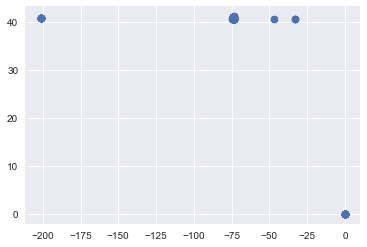

In [8]:
x=data['LONGITUDE']
y=data['LATITUDE']

plt.scatter(x,y)


# やること  
1. 事故原因、streetの相関

In [145]:
Borough_Cont_Factor=data.groupby('CONTRIBUTING FACTOR VEHICLE 1')['CONTRIBUTING FACTOR VEHICLE 1'].count()

In [146]:
Borough_Cont_Factor

CONTRIBUTING FACTOR VEHICLE 1
Accelerator Defective                                       495
Aggressive Driving/Road Rage                               3664
Alcohol Involvement                                        9375
Animals Action                                              627
Backing Unsafely                                          35222
Brakes Defective                                           2986
Cell Phone (hand-held)                                      175
Cell Phone (hands-free)                                     218
Driver Inattention/Distraction                           162919
Driver Inexperience                                       14702
Driverless/Runaway Vehicle                                  294
Drugs (Illegal)                                             578
Failure to Keep Right                                      2092
Failure to Yield Right-of-Way                             52938
Fatigued/Drowsy                                           48441
Fell Aslee

In [ ]:
data_frame1 = data_frame.groupby(['sex',''address]) #「性別」「住所」ごとに集約

In [17]:
Borough_Cont_Factor['DATE'].count()

BOROUGH        CONTRIBUTING FACTOR VEHICLE 1                        
BRONX          Accelerator Defective                                       65
               Aggressive Driving/Road Rage                               449
               Alcohol Involvement                                       1049
               Animals Action                                              54
               Backing Unsafely                                          3654
               Brakes Defective                                           360
               Cell Phone (hand-held)                                      17
               Cell Phone (hands-free)                                     14
               Driver Inattention/Distraction                           13626
               Driver Inexperience                                       1410
               Driverless/Runaway Vehicle                                  33
               Drugs (Illegal)                                           

In [18]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
#to convert into numbers
data_encode =data.apply(lambda x: label_encode.fit_transform(x))

TypeError: ("'>' not supported between instances of 'float' and 'str'", 'occurred at index BOROUGH')

In [ ]:
# 参考（カテゴリー変数をダミー特徴量として変換する方法）
mush_data_dummy = pd.get_dummies(mush_data[['gill_color','gill_attachment','odor','cap_color']])
mush_data_dummy.head()

In [21]:
data_dummy= pd.get_dummies(data[['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1']])

In [111]:
data_dummy.head()

,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective,CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage,CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement,CONTRIBUTING FACTOR VEHICLE 1_Animals Action,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,...,VEHICLE TYPE CODE 1_UNKNOWN,VEHICLE TYPE CODE 1_UTILI,VEHICLE TYPE CODE 1_VAN,VEHICLE TYPE CODE 1_VN,VEHICLE TYPE CODE 1_ambul,VEHICLE TYPE CODE 1_bus,VEHICLE TYPE CODE 1_east,VEHICLE TYPE CODE 1_subn,VEHICLE TYPE CODE 1_unk,VEHICLE TYPE CODE 1_van
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 目的変数：flg立てをする
data_dummy["flg"] = data_dummy["classes"].map(lambda x: 1 if x =='p' else 0)

## 地区と死傷者数・分類の関係

In [8]:
data['BOROUGH'].value_counts()

BROOKLYN         252019
QUEENS           213834
MANHATTAN        207880
BRONX            108798
STATEN ISLAND     37795
Name: BOROUGH, dtype: int64

In [30]:
data['BOROUGH'].value_counts(1)

BROOKLYN         0.307218
QUEENS           0.260670
MANHATTAN        0.253411
BRONX            0.132628
STATEN ISLAND    0.046073
Name: BOROUGH, dtype: float64

In [41]:
data_Bor_Injured=data.groupby('BOROUGH')['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED'].sum()
data_Bor_Killed=data.groupby('BOROUGH')['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED'].sum()

In [42]:
data_Bor_Injured

,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
BOROUGH,,,,
BRONX,31295,7766,1817,21838
BROOKLYN,73771,16960,7906,49212
MANHATTAN,35563,12635,5940,17212
QUEENS,55524,11413,3940,40559
STATEN ISLAND,9172,1429,218,7592


In [139]:
data_Bor_Killed

,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED
BOROUGH,,,,
BRONX,128,76,8,44
BROOKLYN,296,172,26,97
MANHATTAN,170,130,17,23
QUEENS,260,147,18,95
STATEN ISLAND,53,22,2,30


In [58]:
#各地区ごとの負傷者、死者総計を配列に格納
list_injured = data_Bor_Injured.columns
Injured_total=np.array(list(data_Bor_Injured[list_injured[0]]))
list_killed = data_Bor_Killed.columns
Killed_total=np.array(list(data_Bor_Killed[list_killed[0]]))

In [60]:
#総計で割ることにより割合を求める
data_Bor_Injured_r = data_Bor_Injured.div(Injured_total,axis=0)
data_Bor_Killed_r = data_Bor_Killed.div(Killed_total,axis=0)

In [112]:
data_Bor_Killed_r.iloc[:,1]
#iloc:行列名を指定、loc:行列番号を指定

BOROUGH
BRONX            0.593750
BROOKLYN         0.581081
MANHATTAN        0.764706
QUEENS           0.565385
STATEN ISLAND    0.415094
Name: NUMBER OF PEDESTRIANS KILLED, dtype: float64

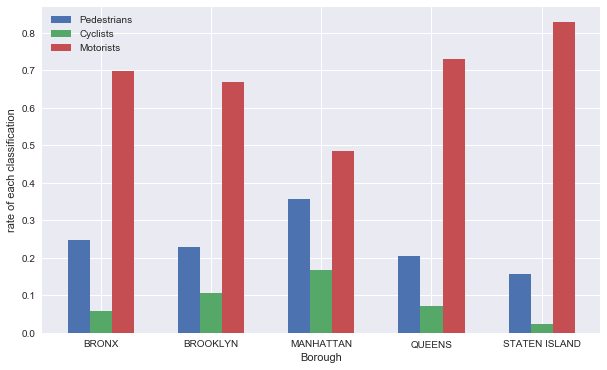

In [107]:
#injuredの地区別割合
plt.figure(figsize=(10,6),facecolor="white")
w=0.2
X = np.arange(5)
plt.bar(X, data_Bor_Injured_r.iloc[:,1], width=w,label='Pedestrians') #Y1
plt.bar(X+w, data_Bor_Injured_r.iloc[:,2],width=w,label='Cyclists') #Y2の棒グラフを隣に書く
plt.bar(X+2*w, data_Bor_Injured_r.iloc[:,3],width=w,label='Motorists') #Y2の棒グラフを隣に書く
plt.xticks(X+ w,[data_Bor_Injured.index[0],data_Bor_Injured.index[1],data_Bor_Injured.index[2],data_Bor_Injured.index[3],data_Bor_Injured.index[4]] )
plt.ylabel('rate of each classification')
plt.xlabel('Borough')
plt.legend()

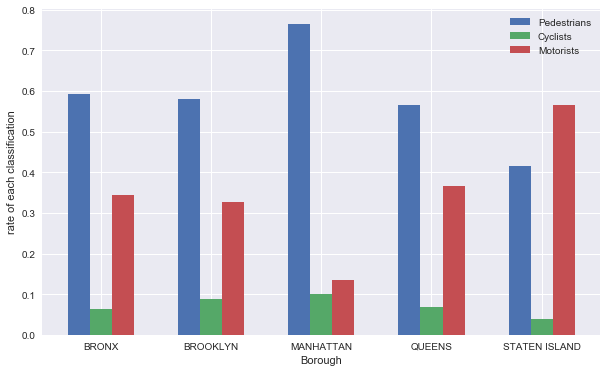

In [108]:
#killed の地域別割合
plt.figure(figsize=(10,6),facecolor="white")
w=0.2
X = np.arange(5)
plt.bar(X, data_Bor_Killed_r.iloc[:,1], width=w,label='Pedestrians') #Y1
plt.bar(X+w, data_Bor_Killed_r.iloc[:,2],width=w,label='Cyclists') #Y2の棒グラフを隣に書く
plt.bar(X+2*w, data_Bor_Killed_r.iloc[:,3],width=w,label='Motorists') #Y2の棒グラフを隣に書く
plt.xticks(X+ w,[data_Bor_Injured.index[0],data_Bor_Injured.index[1],data_Bor_Injured.index[2],data_Bor_Injured.index[3],data_Bor_Injured.index[4]] )
plt.ylabel('rate of each classification')
plt.xlabel('Borough')
plt.legend()

## 時系列ごとのデータ分析

In [ ]:
data_frame1 = data_frame.groupby([,''address])

In [124]:
#damage_timespan= DataFrame[]
data_2017['NUMBER OF PERSONS INJURED'].sum()
dt = {'NUMBER OF PERSONS INJURED':[data_2017['NUMBER OF PERSONS INJURED'].sum(),data_2016['NUMBER OF PERSONS INJURED'].sum(),data_2015['NUMBER OF PERSONS INJURED'].sum(),data_2014['NUMBER OF PERSONS INJURED'].sum(),data_2013['NUMBER OF PERSONS INJURED'].sum(),data_2012['NUMBER OF PERSONS INJURED'].sum()],\
     'NUMBER OF PEDESTRIANS INJURED':[data_2017['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2016['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2015['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2014['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2013['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2012['NUMBER OF PEDESTRIANS INJURED'].sum()],\
      'NUMBER OF CYCLIST INJURED':[data_2017['NUMBER OF PERSONS INJURED'].sum(),data_2016['NUMBER OF PERSONS INJURED'].sum(),data_2015['NUMBER OF PERSONS INJURED'].sum(),data_2014['NUMBER OF PERSONS INJURED'].sum(),data_2013['NUMBER OF PERSONS INJURED'].sum(),data_2012['NUMBER OF PERSONS INJURED'].sum()]}\
    #  'NUMBER OF CYCLIST INJURED':,\
     # 'NUMBER OF MOTORIST INJURED':

In [125]:
dt

{'NUMBER OF CYCLIST INJURED': [48013, 58887, 51352, 51211, 55121, 27447],
 'NUMBER OF PEDESTRIANS INJURED': [9083, 11159, 10082, 11034, 11987, 5906],
 'NUMBER OF PERSONS INJURED': [48013, 58887, 51352, 51211, 55121, 27447]}

In [ ]:
#データフレーム作成まとめ
data = {'column1':[value1,value2,...], 'column2':[value1,value2,...],...}  #データテーブル

data_frame = DataFrame(data)  #データテーブルをpandasのDataFrame配列に格納

data_frame_index1 = DataFrame(data_frame, index = ['value1,value2,...'])  #インデックス付ける


## 時間帯ごとに事故数を抽出

In [ ]:
g = data.groupby(pd.TimeGrouper("M")) 
pd.DatetimeIndex(data.DATE).to_period("M")

In [133]:
per = data.DATE.dt.to_period("M")  # new way to get the same
data.groupby(per)['BOROUGH'].count()

DATE
2012-07    13152
2012-08    13174
2012-09    12802
2012-10    12989
2012-11    12244
2012-12    13210
2013-01    11979
2013-02    11246
2013-03    12809
2013-04    12712
2013-05    14335
2013-06    14045
2013-07    13281
2013-08    12656
2013-09    12861
2013-10    13418
2013-11    13427
2013-12    13197
2014-01    12713
2014-02    12142
2014-03    12128
2014-04    12419
2014-05    13709
2014-06    13971
2014-07    13193
2014-08    12864
2014-09    13503
2014-10    13773
2014-11    12886
2014-12    13023
           ...  
2015-05    14512
2015-06    14088
2015-07    14166
2015-08    14210
2015-09    14001
2015-10    15004
2015-11    13632
2015-12    14159
2016-01    13953
2016-02    12171
2016-03    14006
2016-04    14061
2016-05    14198
2016-06    12514
2016-07    12989
2016-08    12243
2016-09    12087
2016-10    12231
2016-11    12007
2016-12    11975
2017-01    10912
2017-02    10086
2017-03    12218
2017-04    11212
2017-05    13094
2017-06    13369
2017-07    12267
2017-08  

In [134]:
data_timespan=data.groupby(per)['BOROUGH'].count()

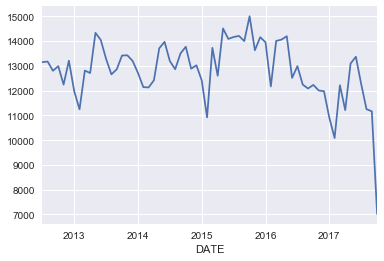

In [135]:
data_timespan.plot()

In [136]:
per2 = data.TIME.dt.to_period("h")  # new way to get the same

In [137]:
month_timespan=data.groupby(per2)['BOROUGH'].count()

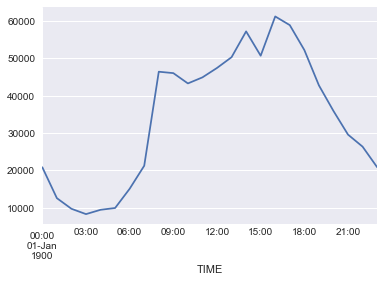

In [138]:
month_timespan.plot()

## 月ごとに事故数を抽出

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137849 entries, 0 to 1137848
Data columns (total 29 columns):
DATE                             1137849 non-null datetime64[ns]
TIME                             1137849 non-null datetime64[ns]
BOROUGH                          820326 non-null object
ZIP CODE                         820247 non-null object
LATITUDE                         927296 non-null float64
LONGITUDE                        927296 non-null float64
LOCATION                         927296 non-null object
ON STREET NAME                   922954 non-null object
CROSS STREET NAME                875298 non-null object
OFF STREET NAME                  172082 non-null object
NUMBER OF PERSONS INJURED        1137849 non-null int64
NUMBER OF PERSONS KILLED         1137849 non-null int64
NUMBER OF PEDESTRIANS INJURED    1137849 non-null int64
NUMBER OF PEDESTRIANS KILLED     1137849 non-null int64
NUMBER OF CYCLIST INJURED        1137849 non-null int64
NUMBER OF CYCLIST KILLED   